<a href="https://colab.research.google.com/github/diqksrk/hanghaeAI2/blob/main/homwork2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [전체 코드] SGD ADAM 성능 비교 1번 케이스

Files already downloaded and verified
50000
torch.Size([3, 32, 32]) 6
train sgd start
Epoch   0 | Loss: 450.1601 | Train Acc: 0.1267
Epoch   1 | Loss: 447.9919 | Train Acc: 0.1302
Epoch   2 | Loss: 446.1623 | Train Acc: 0.1408
Epoch   3 | Loss: 444.3933 | Train Acc: 0.1613
Epoch   4 | Loss: 442.5289 | Train Acc: 0.1827
Epoch   5 | Loss: 440.5112 | Train Acc: 0.1940
Epoch   6 | Loss: 438.3561 | Train Acc: 0.2075
Epoch   7 | Loss: 435.9841 | Train Acc: 0.2147
Epoch   8 | Loss: 433.4104 | Train Acc: 0.2224
Epoch   9 | Loss: 430.6502 | Train Acc: 0.2285
Epoch  10 | Loss: 427.7508 | Train Acc: 0.2360
Epoch  11 | Loss: 424.7477 | Train Acc: 0.2409
Epoch  12 | Loss: 421.7262 | Train Acc: 0.2488
Epoch  13 | Loss: 418.6863 | Train Acc: 0.2548
Epoch  14 | Loss: 415.7202 | Train Acc: 0.2594
Epoch  15 | Loss: 412.9584 | Train Acc: 0.2639
Epoch  16 | Loss: 410.3407 | Train Acc: 0.2731
Epoch  17 | Loss: 407.8416 | Train Acc: 0.2747
Epoch  18 | Loss: 405.4940 | Train Acc: 0.2773
Epoch  19 | Loss: 403

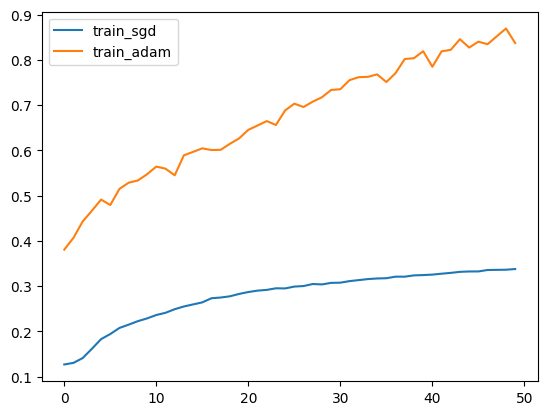

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from torch import nn
from torch.optim import SGD
import numpy as np
from torch.optim import Adam

transform = transforms.ToTensor()
device = torch.device("cuda")

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

print(len(trainset))
print(trainset[0][0].shape, trainset[0][1])

batch_size = 256

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.LeakyReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.layer3(x)

    return x

model = Model(32 * 32 * 3, 1024)
model = model.to(device)

# Accuracy function
def accuracy(model, dataloader):
    cnt = 0
    acc = 0

    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        preds = model(inputs)
        preds = torch.argmax(preds, dim=-1)

        cnt += labels.shape[0]
        acc += (labels == preds).sum().item()

    return acc / cnt

# Training function
def train_model(optimizer, model, trainloader, epochs=50):
    train_accs = []
    loss_fn = nn.CrossEntropyLoss()
    for epoch in range(epochs):
        total_loss = 0.
        for data in trainloader:
            model.zero_grad()
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            preds = model(inputs)
            loss = loss_fn(preds, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        train_acc = accuracy(model, trainloader)
        train_accs.append(train_acc)
        print(f"Epoch {epoch:3d} | Loss: {total_loss:.4f} | Train Acc: {train_acc:.4f}")
    return train_accs

# Train models
lr = 0.001
print("train sgd start")
train_accs_sgd = train_model(SGD(model.parameters(), lr=lr), model, trainloader)
print("train adam start")
train_accs_adam = train_model(Adam(model.parameters(), lr=lr), model, trainloader)

# Plotting function
def plot_acc(train_accs_sgd, train_accs_adam, label1='train_sgd', label2='train_adam'):
    x = np.arange(len(train_accs_sgd))

    plt.plot(x, train_accs_sgd, label=label1)
    plt.plot(x, train_accs_adam, label=label2)
    plt.legend()
    plt.show()

plot_acc(train_accs_sgd, train_accs_adam)

## [MyCode] 1번 케이스
trainset을 CIFAR10으로 변경합니다.
그리고 해당 trainset의 입력 shape를 확인합니다.

In [ ]:
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

print(len(trainset))
print(trainset[0][0].shape, trainset[0][1])

### [LOG]
50000<br/>
torch.Size([3, 32, 32]) 6<br/><br/>


다음은 SGD 옵티마이저와 ADAM 옵티마이저가 각각의 옵티마이저를 사용해 학습을 시키는 코드입니다.

In [ ]:
# Training function
def train_model(optimizer, model, trainloader, epochs=50):
    train_accs = []
    loss_fn = nn.CrossEntropyLoss()
    for epoch in range(epochs):
        total_loss = 0.
        for data in trainloader:
            model.zero_grad()
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            preds = model(inputs)
            loss = loss_fn(preds, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        train_acc = accuracy(model, trainloader)
        train_accs.append(train_acc)
        print(f"Epoch {epoch:3d} | Loss: {total_loss:.4f} | Train Acc: {train_acc:.4f}")
    return train_accs

# Train models
lr = 0.001
print("train sgd start")
train_accs_sgd = train_model(SGD(model.parameters(), lr=lr), model, trainloader)
print("train adam start")
train_accs_adam = train_model(Adam(model.parameters(), lr=lr), model, trainloader)


### [LOG]


이후 서로 간의 정확도를 plot 합니다. 값은 각 에포치 | 손실 | 모델 정확도 순서입니다<br/>
Epoch   0 | Loss: 450.1601 | Train Acc: 0.1267<br/>
Epoch   1 | Loss: 447.9919 | Train Acc: 0.1302<br/>
Epoch   2 | Loss: 446.1623 | Train Acc: 0.1408<br/>
Epoch   3 | Loss: 444.3933 | Train Acc: 0.1613<br/>
Epoch   4 | Loss: 442.5289 | Train Acc: 0.1827<br/>
Epoch   5 | Loss: 440.5112 | Train Acc: 0.1940<br/>
Epoch   6 | Loss: 438.3561 | Train Acc: 0.2075<br/>
Epoch   7 | Loss: 435.9841 | Train Acc: 0.2147<br/>
Epoch   8 | Loss: 433.4104 | Train Acc: 0.2224<br/>
Epoch   9 | Loss: 430.6502 | Train Acc: 0.2285<br/>
Epoch  10 | Loss: 427.7508 | Train Acc: 0.2360<br/>
Epoch  11 | Loss: 424.7477 | Train Acc: 0.2409<br/>
Epoch  12 | Loss: 421.7262 | Train Acc: 0.2488<br/>
Epoch  13 | Loss: 418.6863 | Train Acc: 0.2548<br/>
...<br/>
Epoch  45 | Loss: 95.6770 | Train Acc: 0.8401<br/>
Epoch  46 | Loss: 93.1761 | Train Acc: 0.8345<br/>
Epoch  47 | Loss: 89.3263 | Train Acc: 0.8519<br/>
Epoch  48 | Loss: 83.9663 | Train Acc: 0.8692<br/>
Epoch  49 | Loss: 83.0495 | Train Acc: 0.8370<br/>

In [ ]:
# Plotting function
def plot_acc(train_accs_sgd, train_accs_adam, label1='train_sgd', label2='train_adam'):
    x = np.arange(len(train_accs_sgd))

    plt.plot(x, train_accs_sgd, label=label1)
    plt.plot(x, train_accs_adam, label=label2)
    plt.legend()
    plt.show()

plot_acc(train_accs_sgd, train_accs_adam)

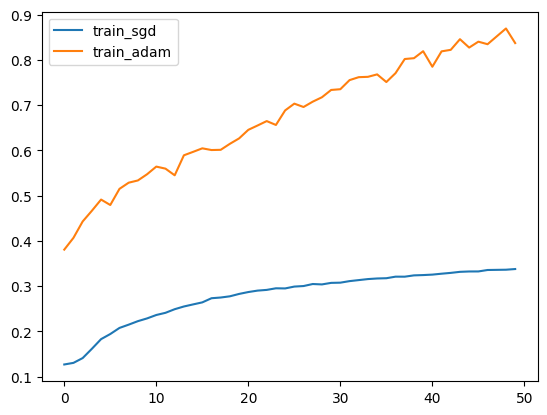

## [FEEDBACK] 1번 케이스
모델의 입력차수가 32 * 32 * 3으로 달라진만큼 각 레이어의 출력값의 차원이 변화해야 하는지가 궁금합니다. 일단 1024로 진행했지만 이 값을 크게 넣어보았을때 정확도가 좀더 올라가는 걸 확인했습니다. 이 값을 어떻게 변화시킬지 어떤 기준으로 변화시킬지 찾는 방법이 있다면 알려주시면 좋을것 같습니다

In [ ]:
class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.LeakyReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.layer3(x)

    return x

model = Model(32 * 32 * 3, 1024)
model = model.to(device)

## [2번 케이스 전체코드] Leaky ReLU와 Sigmoid 성능 비교

100%|██████████| 170M/170M [00:04<00:00, 35.0MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
50000
torch.Size([3, 32, 32]) 6
train sgd start
Epoch   0 | Loss: 370.3871 | Train Acc: 0.3780
Epoch   1 | Loss: 327.3632 | Train Acc: 0.4000
Epoch   2 | Loss: 308.0636 | Train Acc: 0.4563
Epoch   3 | Loss: 295.5746 | Train Acc: 0.4540
Epoch   4 | Loss: 286.5763 | Train Acc: 0.4702
Epoch   5 | Loss: 277.2068 | Train Acc: 0.4755
Epoch   6 | Loss: 271.1507 | Train Acc: 0.5164
Epoch   7 | Loss: 265.7568 | Train Acc: 0.5159
Epoch   8 | Loss: 258.6854 | Train Acc: 0.5511
Epoch   9 | Loss: 252.8980 | Train Acc: 0.5488
Epoch  10 | Loss: 246.2393 | Train Acc: 0.5183
Epoch  11 | Loss: 242.2901 | Train Acc: 0.5819
Epoch  12 | Loss: 236.4066 | Train Acc: 0.5786
Epoch  13 | Loss: 230.7015 | Train Acc: 0.5678
Epoch  14 | Loss: 227.0177 | Train Acc: 0.5937
Epoch  15 | Loss: 221.3367 | Train Acc: 0.6143
Epoch  16 | Loss: 215.7859 | Train Acc: 0.6211
Epoch  17 | Loss: 211.8904 | Train Acc: 0.6308
Epoch  18 | Loss: 204.7737 | Train Acc: 0.6241
Epoch  1

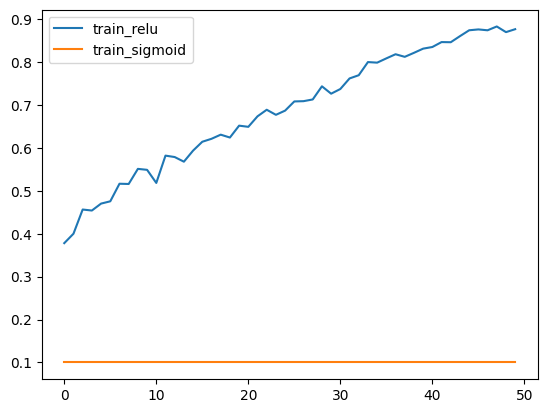

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from torch import nn
from torch.optim import SGD
import numpy as np
from torch.optim import Adam

transform = transforms.ToTensor()
device = torch.device("cuda")

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

print(len(trainset))
print(trainset[0][0].shape, trainset[0][1])

batch_size = 256

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

class SigmoidModel(nn.Module):
    def __init__(self, input_dim, n_dim):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, n_dim)
        self.layer2 = nn.Linear(n_dim, n_dim)
        self.layer3 = nn.Linear(n_dim, 10)

        self.act = nn.Sigmoid()

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.act(self.layer1(x))
        x = self.act(self.layer2(x))
        x = self.layer3(x)

        return x

class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.LeakyReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.layer3(x)

    return x

# Accuracy function
def accuracy(model, dataloader):
    cnt = 0
    acc = 0

    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        preds = model(inputs)
        preds = torch.argmax(preds, dim=-1)

        cnt += labels.shape[0]
        acc += (labels == preds).sum().item()

    return acc / cnt

# Training function
def train_model(optimizer, model, trainloader, epochs=50):
    train_accs = []
    loss_fn = nn.CrossEntropyLoss()
    for epoch in range(epochs):
        total_loss = 0.
        for data in trainloader:
            model.zero_grad()
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            preds = model(inputs)
            loss = loss_fn(preds, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        train_acc = accuracy(model, trainloader)
        train_accs.append(train_acc)
        print(f"Epoch {epoch:3d} | Loss: {total_loss:.4f} | Train Acc: {train_acc:.4f}")
    return train_accs

# Model
model = Model(32 * 32 * 3, 1024)
model = model.to(device)

sigmoid_model = SigmoidModel(32 * 32 * 3, 1024)
sigmoid_model = sigmoid_model.to(device)

# Train models
lr = 0.001
print("train sgd start")
train_accs_relu = train_model(Adam(model.parameters(), lr=lr), model, trainloader)
print("train adam start")
train_accs_sigmoid = train_model(Adam(model.parameters(), lr=lr), sigmoid_model, trainloader)

# Plotting function
def plot_acc(train_accs_first, train_accs_second, label1, label2):
    x = np.arange(len(train_accs_first))

    plt.plot(x, train_accs_first, label=label1)
    plt.plot(x, train_accs_second, label=label2)
    plt.legend()
    plt.show()

plot_acc(train_accs_relu, train_accs_sigmoid, 'train_relu', 'train_sigmoid')

## [MY CODE] 2번 케이스
활성 함수로 시그모이드 함수를 사용하는 모델을 만듭니다.

In [ ]:
class SigmoidModel(nn.Module):
    def __init__(self, input_dim, n_dim):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, n_dim)
        self.layer2 = nn.Linear(n_dim, n_dim)
        self.layer3 = nn.Linear(n_dim, 10)

        self.act = nn.Sigmoid()

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.act(self.layer1(x))
        x = self.act(self.layer2(x))
        x = self.layer3(x)

        return x

## [FEEDBACK] 2번 케이스
지금은 시그모이드로 변경하려라고 해서, 활성함수를 변경하였지만 어떤 상황에서 활성 함수를 변경해야 하는지는 알지 못합니다. 특정한 경우가 있는지 아니면 데이터를 가지고 학습을 시키면 다 찾아가야 하는지 궁금합니다.

## [3번 케이스 전체코드]

Files already downloaded and verified
Files already downloaded and verified
Epoch   0 | Loss: 369.6133 | Train Acc: 0.3854 | Test Acc: 0.3890
Epoch   1 | Loss: 330.1791 | Train Acc: 0.4260 | Test Acc: 0.4234
Epoch   2 | Loss: 313.5363 | Train Acc: 0.4487 | Test Acc: 0.4468
Epoch   3 | Loss: 303.7733 | Train Acc: 0.4513 | Test Acc: 0.4422
Epoch   4 | Loss: 295.3868 | Train Acc: 0.4879 | Test Acc: 0.4765
Epoch   5 | Loss: 289.2619 | Train Acc: 0.5115 | Test Acc: 0.4916
Epoch   6 | Loss: 283.3055 | Train Acc: 0.5133 | Test Acc: 0.4908
Epoch   7 | Loss: 277.6975 | Train Acc: 0.5239 | Test Acc: 0.4951
Epoch   8 | Loss: 272.9998 | Train Acc: 0.5229 | Test Acc: 0.4962
Epoch   9 | Loss: 270.2331 | Train Acc: 0.5468 | Test Acc: 0.5124
Epoch  10 | Loss: 264.9389 | Train Acc: 0.5502 | Test Acc: 0.5121
Epoch  11 | Loss: 261.0276 | Train Acc: 0.5509 | Test Acc: 0.5091
Epoch  12 | Loss: 256.6692 | Train Acc: 0.5633 | Test Acc: 0.5179
Epoch  13 | Loss: 254.2055 | Train Acc: 0.5703 | Test Acc: 0.5164


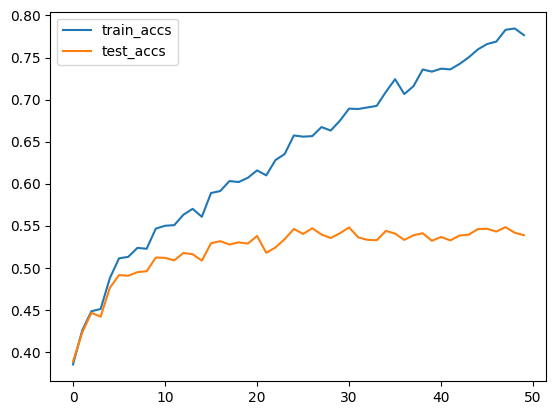

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from torch import nn
import numpy as np
from torch.optim import Adam

transform = transforms.ToTensor()
device = torch.device("cuda")

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

batch_size = 256

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

class DropoutModel(nn.Module):
    def __init__(self, input_dim, n_dim, dropout_prob=0.1):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, n_dim)
        self.layer2 = nn.Linear(n_dim, n_dim)
        self.layer3 = nn.Linear(n_dim, 10)
        self.act = nn.LeakyReLU()
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.dropout(self.act(self.layer1(x)))
        x = self.dropout(self.act(self.layer2(x)))
        x = self.layer3(x)
        return x

# Accuracy function
def accuracy(model, dataloader):
    cnt = 0
    acc = 0
    with torch.no_grad():
        model.eval()
        for data in dataloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            preds = model(inputs)
            preds = torch.argmax(preds, dim=-1)

            cnt += labels.shape[0]
            acc += (labels == preds).sum().item()

    return acc / cnt

# Training function
def train_model(optimizer, model, trainloader, testloader, epochs=50):
    train_accs = []
    test_accs = []
    loss_fn = nn.CrossEntropyLoss()
    for epoch in range(epochs):
        total_loss = 0.
        model.train()
        for data in trainloader:
            model.zero_grad()
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            preds = model(inputs)
            loss = loss_fn(preds, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        train_acc = accuracy(model, trainloader)
        test_acc = accuracy(model, testloader)
        train_accs.append(train_acc)
        test_accs.append(test_acc)
        print(f"Epoch {epoch:3d} | Loss: {total_loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")
    return train_accs, test_accs

# Model
model = DropoutModel(32 * 32 * 3, 1024)
model = model.to(device)

# Train models
lr = 0.001
# Train model
train_accs, test_accs = train_model(Adam(model.parameters(), lr=lr), model, trainloader, testloader)

# Plotting function
def plot_acc(train_accs_first, train_accs_second, label1, label2):
    x = np.arange(len(train_accs_first))

    plt.plot(x, train_accs_first, label=label1)
    plt.plot(x, train_accs_second, label=label2)
    plt.legend()
    plt.show()

plot_acc(train_accs, test_accs, 'train_accs', 'test_accs')

## [MY CODE] 3번 케이스
오버 피팅을 방지하기 위해서 각 뉴런들을 의도적으로 제외하는 dropout 방식을 채택하여 사용합니다.

In [ ]:
class DropoutModel(nn.Module):
    def __init__(self, input_dim, n_dim, dropout_prob=0.1):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, n_dim)
        self.layer2 = nn.Linear(n_dim, n_dim)
        self.layer3 = nn.Linear(n_dim, 10)
        self.act = nn.LeakyReLU()
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.dropout(self.act(self.layer1(x)))
        x = self.dropout(self.act(self.layer2(x)))
        x = self.layer3(x)
        return x

역시 마찬가지로, 오버피팅을 방지하기 위해서 특정 피처들을 제외하는 model.train() 함수를 배치 학습 중간에 집어 넣습니다.

In [ ]:
# Training function
def train_model(optimizer, model, trainloader, testloader, epochs=50):
    train_accs = []
    test_accs = []
    loss_fn = nn.CrossEntropyLoss()
    for epoch in range(epochs):
        total_loss = 0.
        model.train()
        for data in trainloader:
            model.zero_grad()
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            preds = model(inputs)
            loss = loss_fn(preds, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        train_acc = accuracy(model, trainloader)
        test_acc = accuracy(model, testloader)
        train_accs.append(train_acc)
        test_accs.append(test_acc)
        print(f"Epoch {epoch:3d} | Loss: {total_loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")
    return train_accs, test_accs

정확도를 측정할때 기울기를 gradient 계산을 활성화하고, 이전 train() 때와는 다르게 모든 피처를 측정 평가할때 사용하기 위해서 Model.eval() 함수를 사용합니다.

In [ ]:
# Accuracy function
def accuracy(model, dataloader):
    cnt = 0
    acc = 0
    with torch.no_grad():
        model.eval()
        for data in dataloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            preds = model(inputs)
            preds = torch.argmax(preds, dim=-1)

            cnt += labels.shape[0]
            acc += (labels == preds).sum().item()

    return acc / cnt

## [FEEDBACK] 3번 케이스
위의 과적합을 방지하기 위해서 dropout을 하거나 하는 행위가 지금부터 수행할 모든 학습에 적용해야 하는지가 궁금합니다. 이 테크닉을 넣는것이 항상 모든 상황에서 유리한지가 궁금하고 관련 글이나 논문이 있다면 혹은 이전에 이런 궁금증을 가지고 찾아본 경험이 있으시다면 공유 부탁드립니다.